#SALARY PREDICTION USING LINEAR REGRESSION

In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('Salary_Data.csv')


In [ ]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(-2.6805555555555483, 0.5, 'Salary')

<Figure size 1200x600 with 0 Axes>

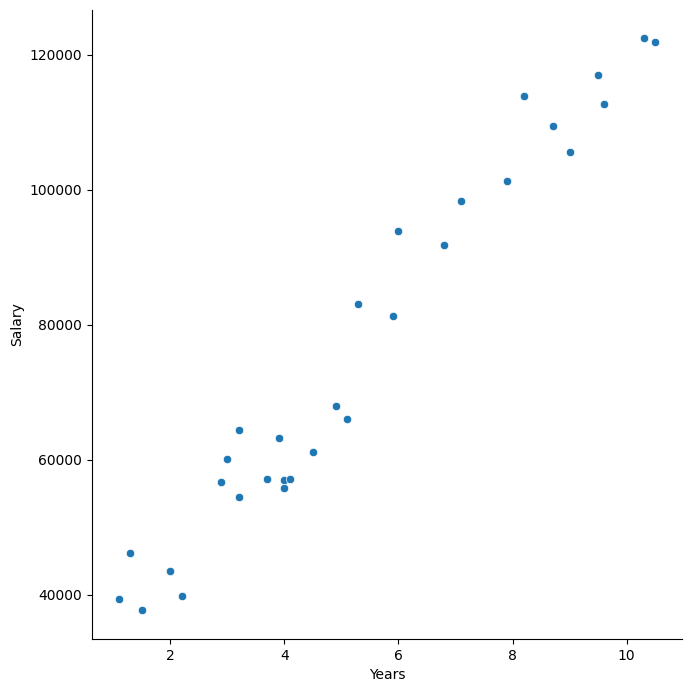

In [ ]:
#Showing how the variables are scattered
plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')

/tmp/ipython-input-738670369.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

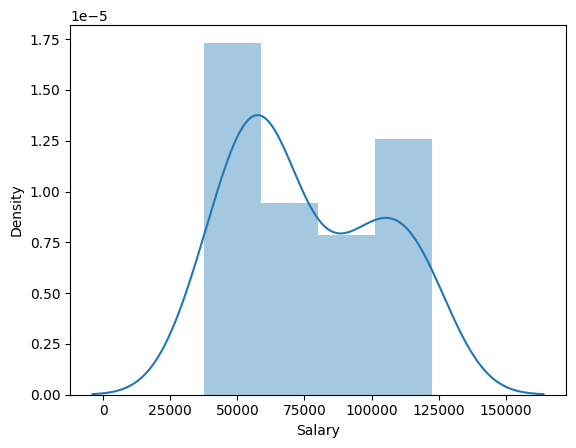

In [ ]:
sns.distplot(df["Salary"])

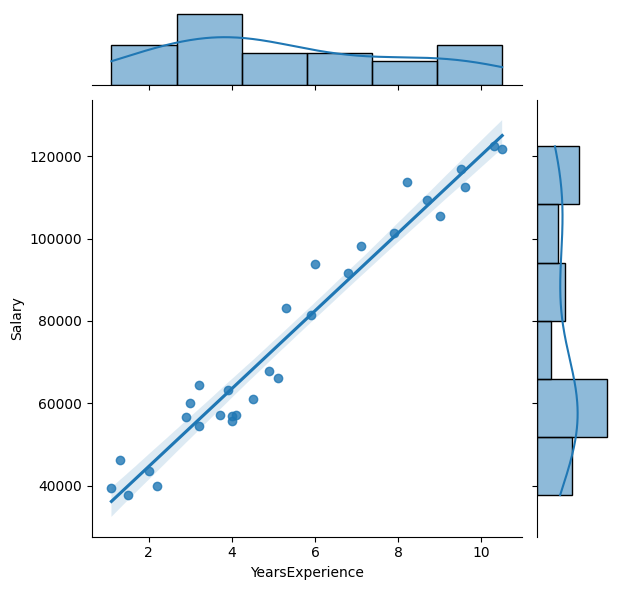

In [ ]:
#Showing a regression line
sns.jointplot(x="YearsExperience", y="Salary", kind="reg", data=df)

In [ ]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
X=df['YearsExperience']
Y=df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, train_size=0.7,random_state=100)

In [ ]:
X_train = X_train.values[:,np.newaxis]
X_test = X_test.values[:,np.newaxis]

In [ ]:
#Importing the model
from sklearn.linear_model import LinearRegression

In [ ]:
#Fitting data to the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predicting the Salary for the test values
y_predict = lr.predict(X_test)
y_predict

array([ 61208.34198766, 117649.32424949, 125434.28732008,  65100.82352296,
        53423.37891707,  64127.70313914, 118622.44463331, 112783.72233036,
        54396.49930089])

In [ ]:
lr.predict([[3.4]])


array([58288.98083619])

Text(0.5, 1.0, 'Actual vs. Predicted')

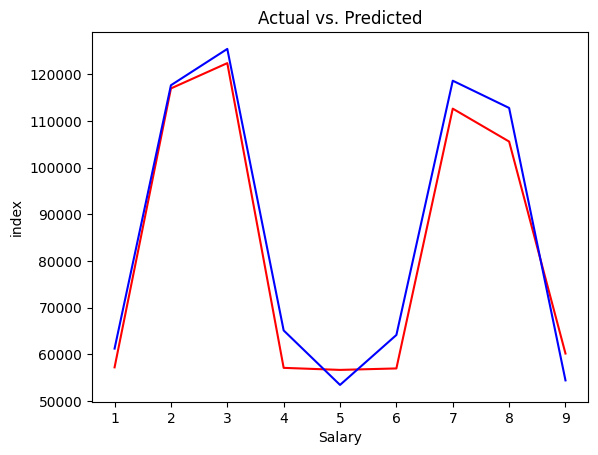

In [ ]:
#Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_predict,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Actual vs. Predicted')

Text(0.5, 1.0, 'Error Value')

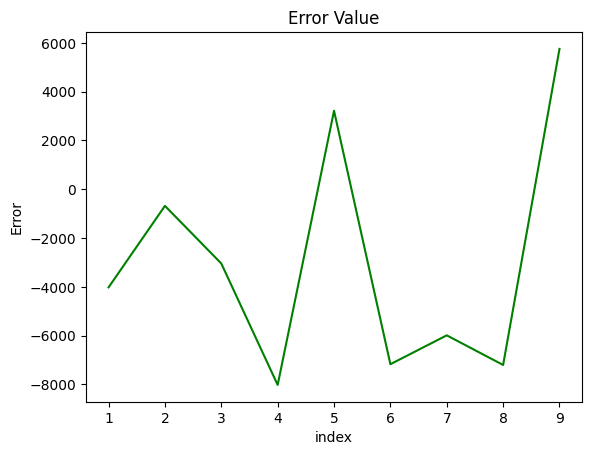

In [ ]:
#Plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_predict,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')

In [ ]:
#Intercept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)
print('R-squared value:', lr.score(X_test, y_test))

Intercept of the model: 25202.887786154883
Coefficient of the line: [9731.20383825]
R-squared value: 0.9627668685473267


#SALARY CLASSIFICATION USING LINEAR REGRESSION ON AN IMPROVED DATASET

In [ ]:
n_samples = 1000

# 2. Generate 'YearsExperience'
years_experience = np.random.uniform(0, 20, n_samples)

# 3. Create 'EducationLevel' with correlation to 'YearsExperience'
education_levels_map = {
    'High School': 1,
    'Bachelors': 2,
    'Masters': 3,
    'PhD': 4
}
reverse_education_map = {v: k for k, v in education_levels_map.items()}
education_level_numerical = np.zeros(n_samples, dtype=int)
education_level_categorical = []

for i, ye in enumerate(years_experience):
    if ye < 3:
        # More likely High School or Bachelors for low experience
        level = np.random.choice(['High School', 'Bachelors'], p=[0.6, 0.4])
    elif ye < 8:
        # More likely Bachelors or Masters for medium experience
        level = np.random.choice(['Bachelors', 'Masters'], p=[0.6, 0.4])
    elif ye < 15:
        # More likely Masters or PhD for high experience
        level = np.random.choice(['Masters', 'PhD'], p=[0.5, 0.5])
    else:
        # Very high experience, mostly Masters or PhD
        level = np.random.choice(['Masters', 'PhD'], p=[0.3, 0.7])
    education_level_categorical.append(level)
    education_level_numerical[i] = education_levels_map[level]

# 4. Generate 'PriorExperienceMonths' correlated with 'YearsExperience'
prior_experience_months = (years_experience * 12 * np.random.uniform(0.7, 1.0, n_samples) +
                           np.random.normal(0, 20, n_samples)).astype(int)
prior_experience_months = np.maximum(0, prior_experience_months) # Ensure non-negative
prior_experience_months = np.minimum(years_experience * 12, prior_experience_months) # Cap at total experience

# 5. Generate 'ProjectCount' correlated with 'YearsExperience' and 'EducationLevel'
project_count = (years_experience * 0.8 +
                 education_level_numerical * 2 +
                 np.random.randint(0, 6, n_samples)).astype(int)
project_count = np.maximum(1, project_count) # Ensure at least 1 project

# 6. Calculate 'Salary' with noise and feature weights
base_salary = 30000
salary_years_coeff = 2500
salary_education_coeff = 8000
salary_prior_exp_coeff = 40 # Per month, so smaller coeff
salary_project_coeff = 700
noise = np.random.normal(0, 7500, n_samples) # Increased noise for variability

salary = (base_salary +
          years_experience * salary_years_coeff +
          education_level_numerical * salary_education_coeff +
          prior_experience_months * salary_prior_exp_coeff * 0.1 # Reduced impact of months directly
          +
          project_count * salary_project_coeff +
          noise)
salary = np.maximum(base_salary, salary).astype(int) # Ensure minimum salary

# 7. Create a pandas DataFrame
df_improved_salary = pd.DataFrame({
    'YearsExperience': years_experience,
    'EducationLevel': education_level_categorical,
    'PriorExperienceMonths': prior_experience_months,
    'ProjectCount': project_count,
    'Salary': salary
})

# 8. Display the first few rows and the info
print("First few rows of the improved salary dataset:")
display(df_improved_salary.head())
print("\nInformation about the improved salary dataset:")
df_improved_salary.info()

First few rows of the improved salary dataset:


,YearsExperience,EducationLevel,PriorExperienceMonths,ProjectCount,Salary
0,5.952639,Masters,46.000000,12,87485
1,2.536050,High School,30.432600,4,46362
2,14.395786,Masters,105.000000,18,107653
3,12.383716,PhD,148.604594,18,114414
4,7.838691,Bachelors,94.064296,13,73972



Information about the improved salary dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearsExperience        1000 non-null   float64
 1   EducationLevel         1000 non-null   object 
 2   PriorExperienceMonths  1000 non-null   float64
 3   ProjectCount           1000 non-null   int64  
 4   Salary                 1000 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


In [ ]:
X_improved_salary = df_improved_salary.drop('Salary', axis=1)
y_improved_salary = df_improved_salary['Salary']

# One-hot encode 'EducationLevel'
X_improved_salary = pd.get_dummies(X_improved_salary, columns=['EducationLevel'], drop_first=True)

print("First few rows of the processed X_improved_salary DataFrame:")
display(X_improved_salary.head())

print("\nInformation about the processed X_improved_salary DataFrame:")
X_improved_salary.info()

First few rows of the processed X_improved_salary DataFrame:


,YearsExperience,PriorExperienceMonths,ProjectCount,EducationLevel_High School,EducationLevel_Masters,EducationLevel_PhD
0,5.952639,46.000000,12,False,True,False
1,2.536050,30.432600,4,True,False,False
2,14.395786,105.000000,18,False,True,False
3,12.383716,148.604594,18,False,False,True
4,7.838691,94.064296,13,False,False,False



Information about the processed X_improved_salary DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearsExperience             1000 non-null   float64
 1   PriorExperienceMonths       1000 non-null   float64
 2   ProjectCount                1000 non-null   int64  
 3   EducationLevel_High School  1000 non-null   bool   
 4   EducationLevel_Masters      1000 non-null   bool   
 5   EducationLevel_PhD          1000 non-null   bool   
dtypes: bool(3), float64(2), int64(1)
memory usage: 26.5 KB


In [ ]:
from sklearn.model_selection import train_test_split

X_train_improved_salary, X_test_improved_salary, y_train_improved_salary, y_test_improved_salary = train_test_split(X_improved_salary, y_improved_salary, test_size=0.3, random_state=42)

print("Shape of X_train_improved_salary:", X_train_improved_salary.shape)
print("Shape of X_test_improved_salary:", X_test_improved_salary.shape)
print("Shape of y_train_improved_salary:", y_train_improved_salary.shape)
print("Shape of y_test_improved_salary:", y_test_improved_salary.shape)

Shape of X_train_improved_salary: (700, 6)
Shape of X_test_improved_salary: (300, 6)
Shape of y_train_improved_salary: (700,)
Shape of y_test_improved_salary: (300,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model object
lr_model_improved = LinearRegression()

# Fit the instantiated model to the training data
lr_model_improved.fit(X_train_improved_salary, y_train_improved_salary)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [ ]:
y_pred_improved_salary = lr_model_improved.predict(X_test_improved_salary)
print("Predictions made on the test set.")

Predictions made on the test set.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae_improved = mean_absolute_error(y_test_improved_salary, y_pred_improved_salary)
mse_improved = mean_squared_error(y_test_improved_salary, y_pred_improved_salary)
r2_improved = r2_score(y_test_improved_salary, y_pred_improved_salary)

# Print the metrics
print(f"Mean Absolute Error (MAE) for Improved Model: {mae_improved:.2f}")
print(f"Mean Squared Error (MSE) for Improved Model: {mse_improved:.2f}")
print(f"R-squared (R2) for Improved Model: {r2_improved:.2f}")

Mean Absolute Error (MAE) for Improved Model: 6366.05
Mean Squared Error (MSE) for Improved Model: 61684702.85
R-squared (R2) for Improved Model: 0.91


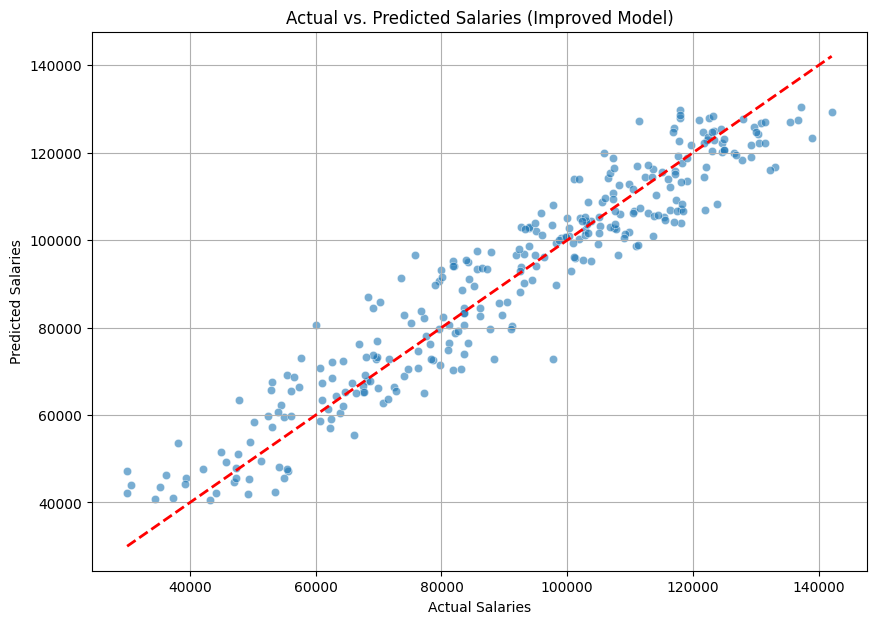

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test_improved_salary, y=y_pred_improved_salary, alpha=0.6)

# Add a perfect prediction line (y=x)
plt.plot([y_test_improved_salary.min(), y_test_improved_salary.max()],
         [y_test_improved_salary.min(), y_test_improved_salary.max()],
         'r--', lw=2)

plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual vs. Predicted Salaries (Improved Model)')
plt.grid(True)
plt.show()
